# TP Algorithme de Runge Kutta

**Document à rendre au plus tard le 25 septembre à 18h00**

Nom : Mussard

Prénom : Cassandra

## Introduction

Il est rappelé que les programmes doivent respecter les **bonnes pratiques de la programmation**. En particulier on vérifiera que les interfaces soient bien définies (paramètres en entrée, en sortie avec leurs types, les dimensions, ...). Dans le cas contraire on mettra des **points négatifs** pour un maximum de 4 points.

On rappelle qu'un schéma de Runge Kutta à $s$ étage est défini par
\begin{equation}\label{eq:irk}
(S)\left\{\begin{array}{l}
k_i=f(t_0+c_ih,x_0+h\sum_{j=1}^{s}a_{ij}k_j)\quad \textrm{pour}\;\;i=1,\ldots,s\\
x_1=x_0+h\sum_{i=1}^{s}b_ik_i
\end{array}\right.
\end{equation}
où les coefficients $c_i,a_{ij}$ et $b_i$ sont des constantes qui définissent précisément le schéma. On supposera toujours dans la suite que  $c_i=\sum_{j=1}^{s}a_{ij}$ pour $i=1,\ldots,s$. 

On représente en pratique ce schéma par le tableau de Butcher
$$
\begin{array}{c|ccc}
c_1    & a_{11} & \ldots & a_{1s}\\
\vdots & \vdots &        & \vdots\\ 
c_s    & a_{s1} & \ldots & a_{ss}   \\ \hline
       & b_1    & \ldots & b_s\\
\end{array}$$

Si la matrice des coefficient $A$ est triangulaire inférieure stricte alors le schéma est explicite, sinon il est implicite.

On donne ci après les schémas les plus courant

$$\begin{array}[t]{ccc}
\begin{array}{c}
\\ \\
\begin{array}{c|c}
0 &   \\\hline
 & 1
\end{array}
\end{array}
& \begin{array}{c}
\\
\begin{array}{c|cc}
0 &  &\\
1/2 & 1/2 &\\ \hline
 & 0 & 1
\end{array}
\end{array}
& \begin{array}{c|ccc}
0 &  &  & \\
1/3 & 1/3 & & \\
2/3 & 0 & 2/3 & \\ \hline
 & 1/4 & 0 & 3/4
\end{array}\\
\textrm{Euler} & \textrm{Runge} & \textrm{Heun}
\end{array}$$
$$\begin{array}[t]{cc}
\begin{array}{c|cccc}
0 &  &  & &\\
1/2 & 1/2 & & &\\
1/2 & 0 & 1/2 & &\\ 
1 &   0 & 0   & 1 &\\ \hline
 & 1/6 & 2/6 & 2/6 & 1/6
\end{array}
& \begin{array}{c|cc}
1/2-\sqrt{3}/6 & 1/4 & 1/4-\sqrt{3}/6\\
1/2+\sqrt{3}/6 & 1/4+\sqrt{3}/6 & 1/4\\ \hline
 & 1/2 & 1/2
\end{array}\\
\textrm{La méthode Rk4} & \textrm{Gauss d'ordre 4}
\end{array}$$


In [2]:
using LinearAlgebra
import Pkg; #Pkg.add("Printf")
using Printf
#using PyPlot

## Les méthodes de Runge Kutta explicites

In [3]:
function euler(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        N::Integer)::Tuple{Vector{Float64},Array{Float64,2}}
# Numerical integration via Euler scheme
# Input
# -----
# fun : second member of the ode
#       xpoint = fun(x,p,t)
#       xpoint : value of fun
#               array(n)
#       x      : state
#                array(n)
#       p      : vector of parameter
#       t      : time
#                real
# tspan : (t0, tf)
# x0 : initial condition
#       array(n)
# p  : vector of parameters
# N  : number of step
#      integer
# Output
# ------
# T   : vector of time
#       array(N+1)
# X   : X[i,:] is the approximation of x(t_i)
#       array(N+1,n)
# ----------------------------------------------

#Initialisation
n  = length(x0)             # dimension n
T  = zeros(N+1)
X  = zeros(N+1,n)
(t0,tf) = tspan 
X[1,:] = x0 
h = (tf-t0)/N #Pas

#Calcul de la solution et du temps selon la méthode d'Euler
for i in 1:N
    X[i+1,:] = X[i,:]+h*fun(X[i,:], p, T[i])
    T[i+1] = T[i]+h
end
return T,X
end



euler (generic function with 1 method)

In [4]:
function runge(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the runge scheme
# the same as Euler
# ----------------------------------------------

#Initialisation
n  = length(x0)             # dimension n
T  = zeros(N+1)
X  = zeros(N+1,n)
(t0,tf) = tspan 
h = (tf-t0)/N
X[1,:] = x0 

#Calcul de la solution et du temps en fonction de la méthode de runge
for i in 1:N
    #Calcul des k1 et k2 pour le schéma de runge
    k1 = fun(X[i,:],p,T[i])
    k2 = fun(X[i,:]+h*0.5*k1, p, T[i]+0.5*h)
    #Calcul de la solution
    X[i+1,:] = X[i,:]+h*k2
    T[i+1] = T[i]+h
end
return T,X
        
end

runge (generic function with 1 method)

In [5]:
function heun(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the Heun scheme
# the same as Euler
# ----------------------------------------------

#Initialisation
n  = length(x0)             # dimension n
T  = zeros(N+1)
X  = zeros(N+1,n)
(t0,tf) = tspan 
h = (tf-t0)/N
X[1,:] = x0
    
#Calcul de la solution et du temps en fonction de la méthode de heun
for i in 1:N
    #Calcul de k1, k2, k3 (car heun d'ordre 3) selon le schéma de heun
    k1 = fun(X[i,:],p,T[i])
    k2 = fun(X[i,:]+h*(1/3)*k1, p, T[i]+(1/3)*h)
    k3 = fun(X[i,:]+h*(2/3)*k2,p, T[i]+(2/3)*h)
    #Calcul de la solution
    X[i+1,:] = X[i,:]+h*(0.25*k1+0.75*k3)
    T[i+1] = T[i]+h
end
return T,X
end

heun (generic function with 1 method)

In [6]:
function rk4(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the RK4 scheme
# the same as Euler
# ----------------------------------------------

#Initialisation
n  = length(x0)             # dimension n
T  = zeros(N+1)
X  = zeros(N+1,n)
(t0,tf) = tspan 
h = (tf-t0)/N #pas
X[1,:] = x0 
    
#Calcul de la solution et du temps selon la méthode rk4
for i in 1:N
    #Calcul de k1, k2, k3 et k4 (car rk4 d'ordre 4) pour le schéma de rk4
    k1 = fun(X[i,:], p, T[i])
    k2 = fun(X[i,:]+0.5*h*k1,p, T[i]+0.5*h)
    k3 = fun(X[i,:]+0.5*h*k2,p, T[i]+0.5*h)
    k4 = fun(X[i,:]+h*k3,p, T[i]+h)
    #Calcul de la solution
    X[i+1,:] = X[i,:] + h*((1/6)*(k1+k4)+(2/6)*(k2+k3))
    T[i+1] = T[i] + h
end
return T,X
end

rk4 (generic function with 1 method)

## Vérification des résultats dans le cas N = 10

In [7]:
function vdp(x::Vector{<:Real},p::Vector{<:Real},t::Real)
# Van der Pol model
# second member of the IVP
# p : paramter vector
# t : time, variable not use here
#
# A compéter
    xpoint = similar(x)
    xpoint[1] = x[2]
    xpoint[2] = (1-x[1]^2)x[2] -x[1]
    return xpoint    
end

function affiche(T,X)
# Affiche les résulats : utile pour vérifier que l'on a les résultats attendus pour N=25
#
    N = length(T)-1
    for i in 1:N+1
        @printf("%20.15f %20.15f %20.15f\n", T[i],X[i,1],X[i,2])
    end
end

mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
t0 = 0.0
tspan = (t0, tf)
x0 = [2.00861986087484313650940188,0]
N = 10

println("Euler")
T_Euler,X_Euler = euler(vdp, tspan, x0, p, N)
affiche(T_Euler,X_Euler)

println("Runge")
T_Runge,X_Runge = runge(vdp, tspan, x0, p, N)
affiche(T_Runge,X_Runge)

println("Heun")
T_Heun,X_Heun = heun(vdp, tspan, x0, p, N)
affiche(T_Heun,X_Heun)

println("RK4")
T_RK4,X_RK4 = rk4(vdp, tspan, x0, p, N)
affiche(T_RK4,X_RK4)


Euler
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    2.008619860874843   -1.338401032434280
   1.332657371864626    1.116804859682459    0.029458487293659
   1.998986057796939    1.136433894810396   -0.719553966980973
   2.665314743729252    0.656974445534582   -1.337038672872153
   3.331643429661565   -0.233932776401004   -2.281177517157184
   3.997972115593877   -1.753946793786687   -3.562133341262534
   4.664300801526190   -4.127498422185830    2.534846643721279
   5.330629487458503   -2.438457389035097  -21.800755581293878
   5.996958173390816  -16.964926207850183   51.673054627620850
   6.663286859323128   17.466312380281039 -9812.202238480942469
Runge
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.562712360278651    0.014729243646829
   1.332657371864626    1.220894137875029   -0.531644111154892
   1.998986057796939    0.653509832528317   -1.176382554058143
   2.665314743729252   -0.425046060567530 

## Graphiques de la figure 3, cas N = 25

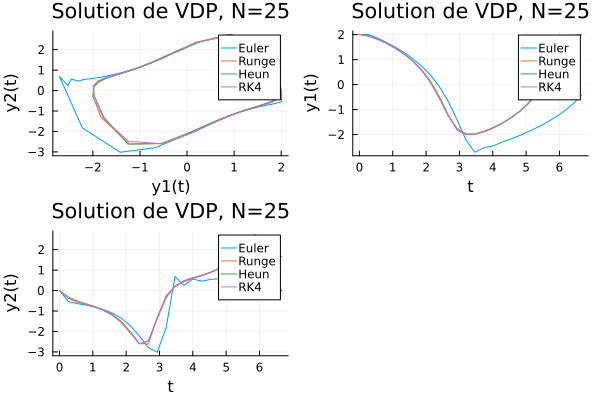

In [8]:
using Plots

N=25
T_Euler,X_Euler = euler(vdp, tspan, x0, p, N)
T_Runge,X_Runge = runge(vdp, tspan, x0, p, N)
T_Heun,X_Heun = heun(vdp, tspan, x0, p, N)
T_RK4,X_RK4 = rk4(vdp, tspan, x0, p, N)

#Figure 3 (toutes les méthodes sur un même graph)
p1 = plot(X_Euler[:,1], X_Euler[:,2], label = "Euler", xlabel = "y1(t)", ylabel = "y2(t)")
p2 = plot!(X_Runge[:,1], X_Runge[:,2], label = "Runge")
p3 = plot!(X_Heun[:,1], X_Runge[:,2],label = "Heun") 
p4 = plot!(X_RK4[:,1], X_RK4[:,2], label = "RK4")

#Deuxieme graph
p5 = plot(T_Euler, X_Euler[:,1], label = "Euler", xlabel = "t", ylabel = "y1(t)")
p6 = plot!(T_Runge, X_Runge[:,1], label = "Runge")
p7 = plot!(T_Heun,X_Heun[:,1], label = "Heun") 
p8 = plot!(T_RK4, X_RK4[:,1], label = "RK4")

#Troisième graph
p9 = plot(T_Euler, X_Euler[:,2], label = "Euler", xlabel = "t", ylabel = "y2(t)")
p10 = plot!(T_Runge, X_Runge[:,2], label = "Runge")
p11 = plot!(T_Heun,X_Heun[:,2], label = "Heun") 
p12 = plot!(T_RK4, X_RK4[:,2], label = "RK4")

plot(p1, p5, p9, title = "Solution de VDP, N=25" )


## Graphique de la figure 1

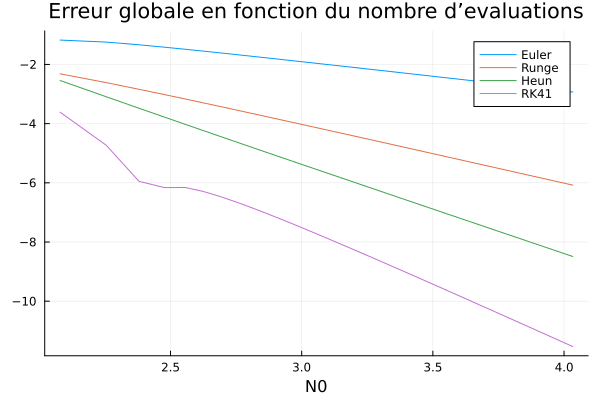

In [9]:
N0 = [collect(120:60:1080); collect(1200:600:10800)]
erreur = zeros(4, length(N0))
for i in 1:length(N0)
    N = N0[i]
    erreur[1,i] = abs(euler(vdp, tspan, x0, p, N)[2][end,1] - x0[1])
    erreur[2,i] = abs(runge(vdp, tspan, x0, p, UInt64( N/2))[2][end,1] - x0[1])
    erreur[3,i] = abs(heun(vdp, tspan, x0, p,UInt64( N/3))[2][end,1] - x0[1])
    erreur[4,i] = abs(rk4(vdp, tspan, x0, p, UInt64(N/4))[2][end,1] - x0[1])
end

plot_methodes = plot(log10.(N0),log10.(erreur'), label = ["Euler" "Runge" "Heun" "RK41"], xlabel = "N0", title = "Erreur globale en fonction du nombre d’evaluations")

## Ordre pour les méthodes explicites
On demande de réaliser la figure 1 uniquement pour la première variable

## Runge Kutta implicite, schéma de Gauss
### Point fixe
#### Code


In [10]:
function gauss_fp(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        option)::Tuple{Vector{Float64},Array{Float64,2},Int,Array{Int,1}}
# Numerical integration with Gauss scheme and the fixed point algorithm
#
# Input parameters
# ----------------
# fun : second member of the ode
#       fun(x,p,t)
#       Input
#       x      : state
#                array(n)
#       p      : vector of parameters
#       t      : time
#                real
#       Output
#       xpoint : value of fun
#               array(n) 
# tspan = (t0,tf)
# x0    = initial point
#         array(n)
# option[1] = N = number of step
#                 Integer
# option[2] = maximum number of iterations for the fixed point
#             real
# option[3] = epsilon for the test of progress in the fixed point
#             real
#
# Output parameters
# -----------------
# T = vector of time
#     real(N+1)
# X = Matrix of solution
#     real(N+1,n)
# The line i of [T X] contains ti and x_i the approximation of x(t_i)
# ifail[i] = number of iteration for the fixed point on [t_i,t_{i+1}] if the fixed point converge
# ifail[i] = -1 if the fixed point don't converge on [t_i,t_{i+1}]: maximum number of iteration
# is attained in the fixed point
#            integer(N)
# nfun = number of evaluation of phi
#        integer
# ndfun = number of evaluation of the derivative of fun
#         integer
# ---------------------------------------------------------------------------------------------
#
# Initialisation
# --------------
# Coefficent of the Butcher's array

#Initialisation
N, nb_iteration_max, fpeps = option
N = UInt64(N)
t0, tf = tspan
h = (tf-t0)/N
n  = length(x0)# dimension n  
T  = zeros(N+1)
X  = zeros(N+1,n)
nfun = 0
ifail = -1*ones(Int64,N)
X[1,:] = x0


for i in 2:N+1
    #Calcul de k1 et k2 en fonction du schéma de Gauss
    k1 = fun(x0,p, t0+(0.5-(3^0.5/6))*h)
    k2 = fun(x0, p,t0+(0.5+(3^0.5/6))*h)
    normeprog = 1.0
    nbiter = 0
    nfun += 2
    while (normeprog>fpeps) & (nbiter<nb_iteration_max)
        #Calcul des nouveaux ki   
        new_k1 = fun(x0+0.25*k1*h+(0.25-3^0.5/6)*k2*h,p, t0+(0.5-(3^0.5/6))*h)
        new_k2 = fun(x0+(0.25+3^0.5/6)*k1*h+0.25*k2*h,p,t0+(0.5+(3^0.5/6))*h)
        #Calcul de la norme
        normeprog = norm([new_k1-k1 ; new_k2-k2])
        #Re affectation des ki
        k1 = new_k1
        k2 = new_k2
        nbiter += 1
        nfun += 2
    end
        
    #Test pour voir si il y a convergence et dans le cas positif on change la valeur de ifail
    if max(normeprog)<=fpeps #convergence 
        ifail[i-1] = nbiter
    end 
      
    t0 = t0 + h
    #Calcul de la solution
    x0 = x0 + h*0.5*(k1+k2)
    X[i,:] = x0
    T[i] = t0 
end

return T,X,nfun,ifail

end

gauss_fp (generic function with 1 method)

#### Test dans le cas N = 10, nb_itmax = 15 et K_eps = 1.e-12

In [11]:
#Afficher les resultats
function affiche_gauss(T,X, nfun, ifail)
# Affiche les résulats : utile pour vérifier que l'on a les résultats attendus pour N=25
#
    for i in 1:N+1
        @printf("%20.15f %20.15f %20.15f\n", T[i],X[i,1],X[i,2])
    end
    println("nfun = ", nfun)
    println("ifail = ", ifail)
end

N = 10
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
t0 = 0.0
tspan = (t0, tf)
option = ([10, 15, 1.0e-06])
x0 = [2.00861986087484313650940188,0]
println("Gauss")
T_Gauss, X_Gauss, nfun, ifail = gauss_fp(vdp, tspan, x0, p, option)
affiche_gauss(T_Gauss,X_Gauss, nfun, ifail)

Gauss
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.748077038315635   -0.614452193067304
   1.332657371864626    1.227167526678123   -0.975617349879985
   1.998986057796939    0.345219364241332   -1.811976134160198
   2.665314743729252   -1.241597780608768   -2.475124551330471
   3.331643429661565   -2.013913987826556   -0.001168903518536
   3.997972115593877   -1.753872199839338    0.612809197750127
   4.664300801526190   -1.235039630038150    0.970480377872889
   5.330629487458503   -0.359183505874150    1.797419504046429
   5.996958173390816    1.222176651788524    2.495490845811688
   6.663286859323128    2.014631389666057    0.015750010678871
nfun = 296
ifail = [-1, 13, 11, 15, -1, -1, 13, 11, 15, -1]


#### Graphique 2, figure 3

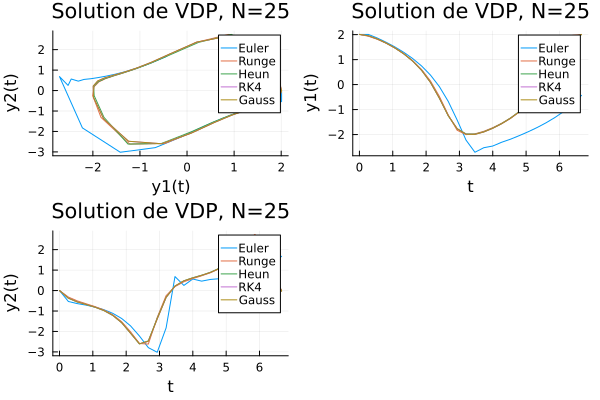

In [12]:
#Même graphique avec toutes les autres méthodes 
using Plots

option = ([25, 15, 1.0e-06])
#Calcul de X et T pour le schéma de Gauss et N = 25
T_Gauss,X_Gauss = gauss_fp(vdp, tspan, x0, p, option)


#Figure 3 (toutes les méthodes sur un même graph)
p1 = plot(X_Euler[:,1], X_Euler[:,2], label = "Euler", xlabel = "y1(t)", ylabel = "y2(t)")
p2 = plot!(X_Runge[:,1], X_Runge[:,2], label = "Runge")
p3 = plot!(X_Heun[:,1], X_Runge[:,2],label = "Heun") 
p4 = plot!(X_RK4[:,1], X_RK4[:,2], label = "RK4")
p5 = plot!(X_Gauss[:,1], X_Gauss[:,2], label = "Gauss")


#Deuxieme graph
p6 = plot(T_Euler, X_Euler[:,1], label = "Euler", xlabel = "t", ylabel = "y1(t)")
p7 = plot!(T_Runge, X_Runge[:,1], label = "Runge")
p8 = plot!(T_Heun,X_Heun[:,1], label = "Heun") 
p9 = plot!(T_RK4, X_RK4[:,1], label = "RK4")
p10 = plot!(T_Gauss, X_Gauss[:,1], label = "Gauss")

#Troisième graph
p11 = plot(T_Euler, X_Euler[:,2], label = "Euler", xlabel = "t", ylabel = "y2(t)")
p12 = plot!(T_Runge, X_Runge[:,2], label = "Runge")
p13 = plot!(T_Heun,X_Heun[:,2], label = "Heun") 
p14 = plot!(T_RK4, X_RK4[:,2], label = "RK4")
p15 = plot!(T_Gauss, X_Gauss[:,2], label = "Gauss")

plot(p1, p6, p11, title = "Solution de VDP, N=25" )


#### Graph schéma de Gauss pour d'autres valeurs de options

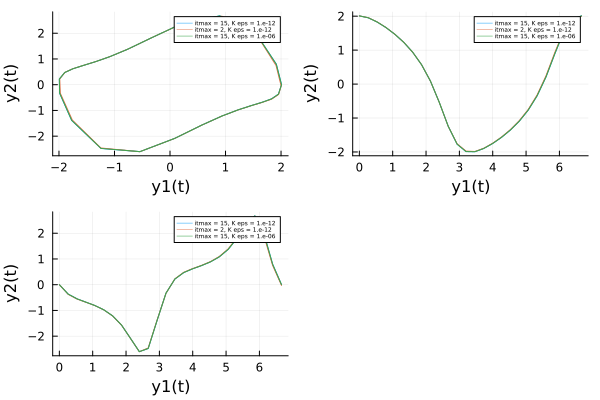

In [13]:
#1 er cas : nb itmax = 15 et K eps = 1.e-12 et N=25
option = ([25, 15, 1.0e-12])
T_Gauss,X_Gauss = gauss_fp(vdp, tspan, x0, p, option)

#2ème cas nb itmax = 2 et K eps = 1.e-12 et N = 25
option2 = ([25, 2, 1.0e-12])
T_Gauss2,X_Gauss2 = gauss_fp(vdp, tspan, x0, p, option2)

#3 eme cas nb itmax = 15 et K eps = 1.e-6 et N = 25
option3 = ([25, 15, 1.0e-06])
T_Gauss3,X_Gauss3 = gauss_fp(vdp, tspan, x0, p, option3)

p1 = plot(X_Gauss[:,1], X_Gauss[:,2], label = "itmax = 15, K eps = 1.e-12", xlabel = "y1(t)", ylabel = "y2(t)")
p2 = plot!(X_Gauss2[:,1], X_Gauss2[:,2], label = "itmax = 2, K eps = 1.e-12", xlabel = "y1(t)", ylabel = "y2(t)")
p3 = plot!(X_Gauss3[:,1], X_Gauss3[:,2], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")



p4 = plot(T_Gauss, X_Gauss[:,1], label = "itmax = 15, K eps = 1.e-12")
p5 = plot!(T_Gauss2, X_Gauss2[:,1], label = "itmax = 2, K eps = 1.e-12")
p6 = plot!(T_Gauss3, X_Gauss3[:,1], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")


p7 = plot(T_Gauss, X_Gauss[:,2], label = "itmax = 15, K eps = 1.e-12")
p8 = plot!(T_Gauss2, X_Gauss2[:,2], label = "itmax = 2, K eps = 1.e-12")
p9 = plot!(T_Gauss3, X_Gauss3[:,2], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")

plot(p1, p4, p7, legendfont=font(4))

In [14]:
#On remarque que pour différentes valeurs d'itération max et de K_eps on obtient a peu près
#la même solution donc pour ces valeurs, ces paramètres n'influent pas trop sur la solution.

#### Ordre

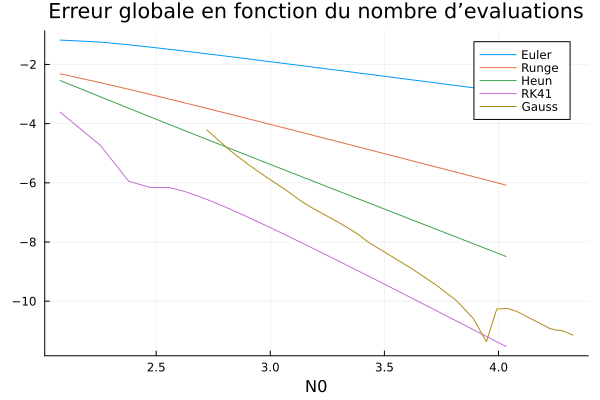

In [15]:
N0 = [collect(120:60:1080) ; collect(1200:600:10800)]/4
erreur = zeros(1, length(N0))
nfunbis = zeros(1, length(N0))
for i in 1:length(N0)
    N = N0[i]
    nfunbis[:,i] .= gauss_fp(vdp, tspan, x0, p, ([N, 15, 1.e-6]))[3]
    erreur[1,i] = abs(gauss_fp(vdp, tspan, x0, p, ([N, 15, 1.e-6]))[2][end,1] - x0[1])
end

plot_methode_avec_gauss = plot(plot_methodes, log10.(nfunbis'),log10.(erreur'), label ="Gauss")

### Newton
#### Code

In [16]:
function gauss_newton(fun, dfun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        option)::Tuple{Vector{Float64},Array{Float64,2},Int,Int,Array{Int,1}}
# Numerical integration with Gauss scheme and the Newton algorithm
#
# Input parameters
# ----------------
# fun : second member of the ode
#       fun(x,p,t)
#       Input
#       x      : state
#                array(n)
#       p      : vector of parameters
#       t      : time
#                real
#       Output
#       xpoint : value of fun
#               array(n) 
# tspan = (t0,tf)
# x0    = initial point
#         array(n)
# option[1] = N = number of step
#                 Integer
# option[2] = maximum number of iterations for the Newton algorithm
#             real
# option[3] = epsilon for the test of progress in the Newton algorithm
#             real
#
# Output parameters
# -----------------
# T = vector of time
#     real(N+1)
# X = Matrix of solution
#     real(N+1,n)
# The line i of [T X] contains ti and x_i the approximation of x(t_i)
# ifail[i] = number of iteration for the fixed point on [t_i,t_{i+1}] if the fixed point converge
# ifail[i] = -1 if the fixed point don't converge on [t_i,t_{i+1}]: maximum number of iteration
# is attained in the fixed point
#            integer(N)
# nfun = number of evaluation of phi
#        integer
# ndfun = number of evaluation of the derivative of fun
#         integer
# ndfun = number of evaluation of the derivative of fun
#         integer
# ---------------------------------------------------------------------------------------------
#Initialisation
N, nb_iteration_max, fpeps = option
N = UInt64(N)
t0, tf = tspan
h = (tf-t0)/N
n  = length(x0)# dimension n  
T  = zeros(N+1)
X  = zeros(N+1,n)
nfun = 0
ifail = -1*ones(Int64,N)
X[1,:] = x0
ndfun = 0
jacobienne = zeros(4,4)
nbiter = 0

    
for i in 2:N+1
    #Calcul de k1 et k2 pour le schéma de Gauss
    k1 = fun(x0,p, t0+(0.5-(3^0.5/6))*h)
    k2 = fun(x0, p,t0+(0.5+(3^0.5/6))*h)
    normeprog = 1.0
    nbiter = 0
    nfun += 2
    while (normeprog>fpeps) & (nbiter<nb_iteration_max)
        #Algo de Newton pour trouver les k1 et k2
        #Calcul de la jacobienne
        jacobienne[1:2,1:2] = h*0.25*dfun(x0+0.25*k1*h+(0.25-3^0.5/6)*k2*h,p, t0+(0.5-(3^0.5/6))*h)
        jacobienne[1:2,3:4] = (1-2*3^0.5/3)*jacobienne[1:2,1:2]
        jacobienne[3:4,1:2] = h*(0.25+3^0.5/6)*dfun(x0+h*((1/4+3^0.5/6)*k1+0.25*k2),p, t0+(0.5+(3^0.5/6))*h)
        jacobienne[3:4,3:4] = 1/(1+2*3^0.5/3)*jacobienne[3:4,1:2]
        jacobienne = Matrix(I, 4, 4) - jacobienne 
        #Formule algo de Newton (sur deux lignes)
        res = (jacobienne)\[k1 .*ones(2)-fun(x0+h*(0.25*k1+(0.25-3^0.5/6)*k2), p,t0+(0.5-(3^0.5/6))*h); 
        k2 .* ones(2)-fun(x0+h*((0.25+3^0.5/6)*k1+0.25*k2), p,t0+(0.5+(3^0.5/6))*h)]
        #Nouveaux k1 et k2 trouvés par l'algo de Newton
        k1 = k1 - res[1:2]
        k2 = k2 - res[3:4]
        normeprog = norm(res)

        ndfun+=2
        nfun += 2
        nbiter += 1
    end
        
    #Test pour voir si il y a convergence et dans le cas positif on change la valeur de ifail
    if max(normeprog)<=fpeps #convergence 
        ifail[i-1] = nbiter
    end 
      
    t0 = t0 + h
    #Calcul de la solution
    x0 = x0 + h*0.5*(k1+k2)
    X[i,:] = x0
    T[i] = t0 
end

    
return T,X,nfun,ndfun,ifail
end

gauss_newton (generic function with 1 method)

#### Test dans le cas N = 10, nb_itmax = 15 et K_eps = 1.e-12

In [17]:
function dvdp(x::Vector{<:Real},p::Vector{<:Real},t::Real)::Matrix{<:Real}
# Van der Pol model
# derivative of the second member of the IVP
# x : state
#     real(n)
# p : paramter vector
# t : time, variable not use here
#     real
# Output
# Xpoint::Jacobian matrix{<:Real},
#       real(n,n)
# --------------------------------------
    n = length(x)
    Jac = ones(n,n)
    Jac[1,1] = 0
    Jac[2,1] = -2*x[1]*x[2] -1
    Jac[1,2] = 1
    Jac[2,2] = (1-x[1]^2)
    
    return Jac
end

# comptéter


dvdp (generic function with 1 method)

In [18]:
#Afficher les resultats
function affiche_gauss_newton(T,X, nfun, ndfun, ifail)
# Affiche les résulats : utile pour vérifier que l'on a les résultats attendus pour N=25
#
    for i in 1:N+1
        @printf("%20.15f %20.15f %20.15f\n", T[i],X[i,1],X[i,2])
    end
    println("nfun : ", nfun)
    println("ndfun : ", ndfun)
    println("ifail = ",ifail)
end

N = 10
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
t0 = 0.0
tspan = (t0, tf)
option = ([10, 15, 1.0e-6])
x0 = [2.00861986087484313650940188,0]
println("Gauss")
T_Gauss_Newton, X_Gauss_Newton, nfun, ndfun, ifail = gauss_newton(vdp, dvdp, tspan, x0, p,option)
affiche_gauss_newton(T_Gauss_Newton,X_Gauss_Newton, nfun, ndfun,  ifail)



Gauss
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.748103353412420   -0.614524376585803
   1.332657371864626    1.227167371665737   -0.975642346688062
   1.998986057796939    0.345201034491682   -1.812011679746201
   2.665314743729252   -1.241634876414838   -2.475102844185241
   3.331643429661565   -2.013908638346081   -0.001153761617750
   3.997972115593877   -1.753891509975080    0.612895411728274
   4.664300801526190   -1.235024728110440    0.970518388811259
   5.330629487458503   -0.359136669330347    1.797486858502427
   5.996958173390816    1.222255698893968    2.495430848815410
   6.663286859323128    2.014631461651370    0.015689664812240
nfun : 96
ndfun : 76
ifail = [4, 3, 3, 4, 5, 4, 3, 3, 4, 5]


#### Graphique 2 figure 3

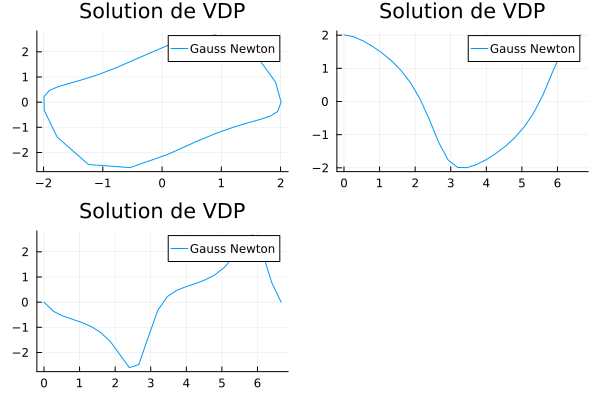

In [19]:
#Même graphique avec toutes les autres méthodes 
using Plots

option = ([25, 15, 1.0e-06])
#Calcul de X et T pour le schéma de Gauss et N = 25
T_Gauss_Newton, X_Gauss_Newton, nfun, ndfun, ifail = gauss_newton(vdp, dvdp, tspan, x0, p,option)

#Figure 3 (toutes les méthodes sur un même graph)
p1 = plot(X_Gauss_Newton[:,1], X_Gauss_Newton[:,2], label = "Gauss Newton")

#Deuxieme graph
p2 = plot(T_Gauss_Newton, X_Gauss_Newton[:,1], label = "Gauss Newton")

#Troisième graph
p3 = plot(T_Gauss_Newton, X_Gauss_Newton[:,2], label = "Gauss Newton")

plot(p1, p2, p3, title = "Solution de VDP" )




#### Graph schéma de Gauss  avec algo de Newton pour d'autres valeurs de options

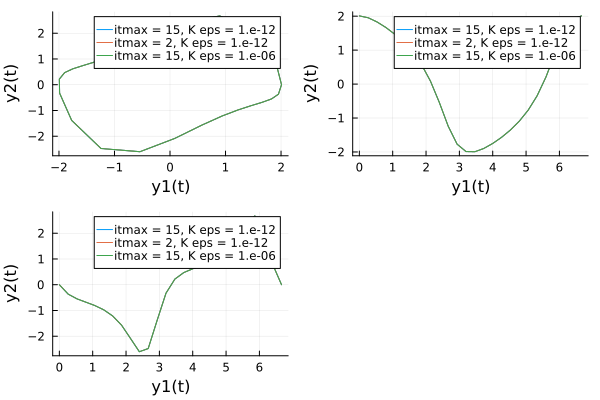

In [20]:
#1 er cas : nb itmax = 15 et K eps = 1.e-12 et N=25
option = ([25, 15, 1.0e-12])
T_Gauss_Newton, X_Gauss_Newton, nfun, ndfun, ifail = gauss_newton(vdp, dvdp, tspan, x0, p,option)


#2ème cas nb itmax = 2 et K eps = 1.e-12 et N = 25
option2 = ([25, 2, 1.0e-12])
T_Gauss_Newton2, X_Gauss_Newton2, nfun, ndfun, ifail = gauss_newton(vdp, dvdp, tspan, x0, p,option)


#3 eme cas nb itmax = 15 et K eps = 1.e-6 et N = 25
option3 = ([25, 15, 1.0e-06])
T_Gauss_Newton3, X_Gauss_Newton3, nfun, ndfun, ifail = gauss_newton(vdp, dvdp, tspan, x0, p,option)


p1 = plot(X_Gauss_Newton[:,1], X_Gauss_Newton[:,2], label = "itmax = 15, K eps = 1.e-12", xlabel = "y1(t)", ylabel = "y2(t)")
p2 = plot!(X_Gauss_Newton2[:,1], X_Gauss_Newton2[:,2], label = "itmax = 2, K eps = 1.e-12", xlabel = "y1(t)", ylabel = "y2(t)")
p3 = plot!(X_Gauss_Newton3[:,1], X_Gauss_Newton3[:,2], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")



p4 = plot(T_Gauss_Newton, X_Gauss_Newton[:,1], label = "itmax = 15, K eps = 1.e-12")
p5 = plot!(T_Gauss_Newton2, X_Gauss_Newton2[:,1], label = "itmax = 2, K eps = 1.e-12")
p6 = plot!(T_Gauss_Newton3, X_Gauss_Newton3[:,1], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")


p7 = plot(T_Gauss_Newton, X_Gauss_Newton[:,2], label = "itmax = 15, K eps = 1.e-12")
p8 = plot!(T_Gauss_Newton2, X_Gauss_Newton2[:,2], label = "itmax = 2, K eps = 1.e-12")
p9 = plot!(T_Gauss_Newton3, X_Gauss_Newton3[:,2], label = "itmax = 15, K eps = 1.e-06", xlabel = "y1(t)", ylabel = "y2(t)")

plot(p1, p4, p7)

#### Ordre

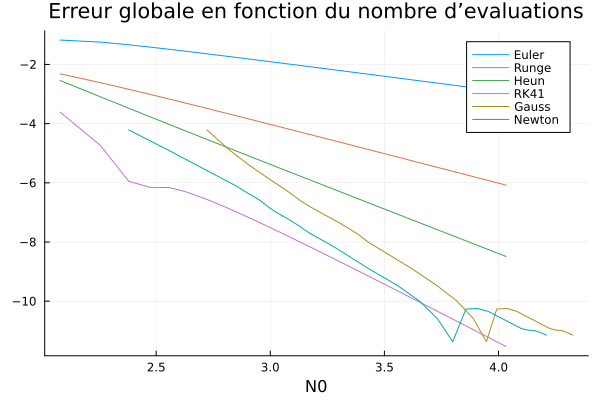

In [21]:
N0 = [collect(120:60:1080) ; collect(1200:600:10800)]/4
erreur = zeros(1, length(N0))
nfunbis = zeros(1, length(N0))
for i in 1:length(N0)
    N = N0[i]
    nfunbis[:,i] .= gauss_newton(vdp,dvdp, tspan, x0, p, ([N, 15, 1.e-6]))[3]
    erreur[1,i] = abs(gauss_fp(vdp, tspan, x0, p, ([N, 15, 1.e-6]))[2][end,1] - x0[1])
end

plot(plot_methode_avec_gauss, log10.(nfunbis'),log10.(erreur'), label = "Newton", xlabel = "N0")

In [ ]:
#On se rend compte que en utilisant l'algorithme de Newton on fait beaucoup moins d'appel 
#à la fonction fun que l'algo de Gauss Newton.
#De plus, le algorithmes donnent à peu près la même solution mais l'erreur globale est 
#moindre pour l'algorithme de Gauss-Newton. En effet, comme on fait moins d'appel
#de la fonction fun, l'erreur globale est moins importante. 
#De plus avec l'algorithme de Gauss Newton on calcul les ki optimaux.